In [3]:
import os
import cv2
import pandas as pd
from skimage.metrics import structural_similarity as ssim

In [5]:
# Base path of the dataset
base_path = r"D:\E - Thesis Collection\DeepFrame-Reconstruction\C - Structural Similarity Index Measure\Dataset"

# Path to original (clean) images
original_path = os.path.join(base_path, "train")
all_folders = [
    "Normal_Noise",
    "Noise_Half_Split",
    "Noise_Half_Split_Strong",
    "Noise_Multiply",
    "Noise_Multiply_Strong",
    "Noise_Overlay",
    "Noise_Overlay_Strong",
    "Gaussian_Blur",
    "Median_Blur",
    "Bilateral_Blur"
]

def compare_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    # making it same size
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))
    score, _ = ssim(img1, img2, full=True)
    return score

def find_matching_image(orig_file, folder_path):
    prefix = orig_file.split('_original')[0]  # "Image_1"
    for f in os.listdir(folder_path):
        if f.startswith(prefix):
            return os.path.join(folder_path, f)
    return None

results = []

for file in os.listdir(original_path):
    orig_img = os.path.join(original_path, file)
    row = {"Image": file}
    
    for folder in all_folders:
        folder_path = os.path.join(base_path, folder)
        match_img = find_matching_image(file, folder_path)
        if match_img:
            row[folder] = compare_images(orig_img, match_img)
        else:
            row[folder] = None
    
    results.append(row)

df = pd.DataFrame(results)
output_file = r"D:\E - Thesis Collection\DeepFrame-Reconstruction\C - Structural Similarity Index Measure\SSIM_Output\plant_disease_ssim_score.xlsx"
df.to_excel(output_file, index=False)
print(f"✅ SSIM results saved to {output_file}")

✅ SSIM results saved to D:\E - Thesis Collection\DeepFrame-Reconstruction\C - Structural Similarity Index Measure\SSIM_Output\plant_disease_ssim_score.xlsx


In [ ]:
# For blure :
#     Image_1_bilateral.jpg
#     Image_1_gaussian.jpg
#     Image_1_median.jpg
    
# For Noise:
#     Image_1_noise5_half_split.jpg
#     Image_1_noise6_half_split_strong.jpg
#     Image_1_noise3_multiply.jpg
#     Image_1_noise4_multiply_strong.jpg
#     Image_1_noise1_overlay.jpg
#     Image_1_noise2_overlay_strong.jpg
#     Image_1_NormalNoise.jpg

# For Original:
#     Image_1_original.jpg

# Make Historgram for Visualization

In [1]:
import pandas as pd
excel_file = r"D:\E - Thesis Collection\DeepFrame-Reconstruction\C - Structural Similarity Index Measure\SSIM_Output\plant_disease_ssim_score.xlsx"

df = pd.read_excel(excel_file)
df.head()

,Image,Normal_Noise,Noise_Half_Split,Noise_Half_Split_Strong,Noise_Multiply,Noise_Multiply_Strong,Noise_Overlay,Noise_Overlay_Strong,Gaussian_Blur,Median_Blur,Bilateral_Blur
0,Image_100_original.jpg,0.146834,0.898184,0.866382,0.159793,0.058796,0.147457,0.052454,0.941115,0.926617,0.959594
1,Image_101_original.jpg,0.147807,0.927039,0.909847,0.165227,0.060473,0.147450,0.051451,0.977041,0.985387,0.990648
2,Image_102_original.jpg,0.151343,0.944378,0.933219,0.162555,0.061679,0.151726,0.056523,0.979251,0.985921,0.989529
3,Image_103_original.jpg,0.236537,0.990996,0.990488,0.237127,0.150595,0.236357,0.149847,0.991230,0.999499,0.999388
4,Image_10_original.jpg,0.110000,0.745418,0.718426,0.116632,0.036821,0.110492,0.034007,0.801689,0.816788,0.808600


# Plot histogram for a single type of blur

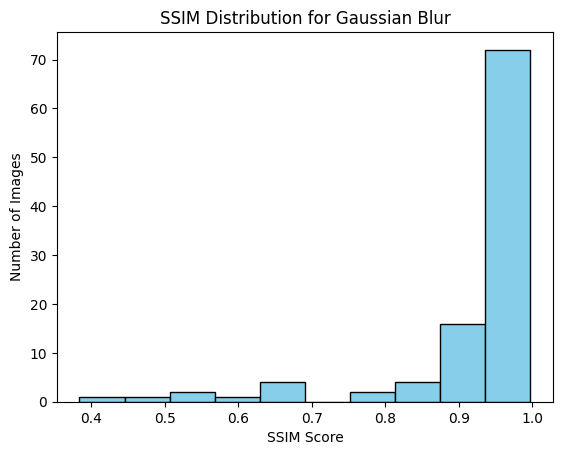

In [2]:
import matplotlib.pyplot as plt

# Example: Histogram for Gaussian_Blur
plt.hist(df['Gaussian_Blur'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('SSIM Distribution for Gaussian Blur')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


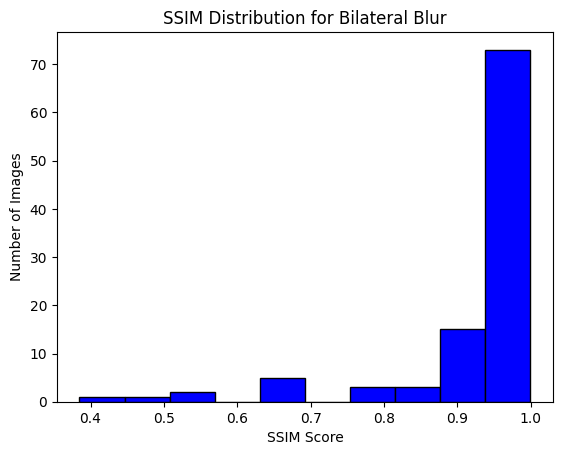

In [3]:
import matplotlib.pyplot as plt

# Example: Histogram for Bilateral_Blur
plt.hist(df['Bilateral_Blur'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('SSIM Distribution for Bilateral Blur')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


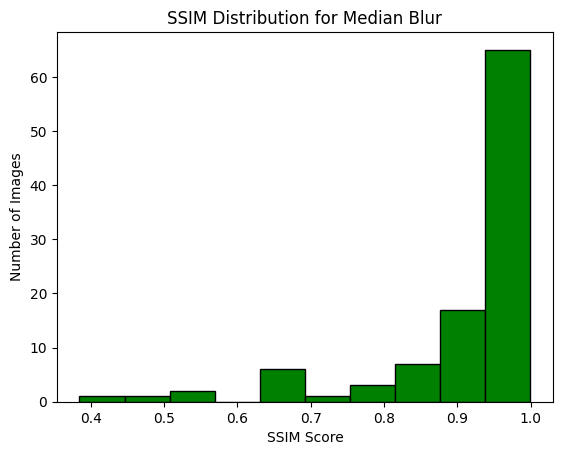

In [4]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Median_Blur'].dropna(), bins=10, color='green', edgecolor='black')
plt.title('SSIM Distribution for Median Blur')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


# Plot histogram for a single type of blur

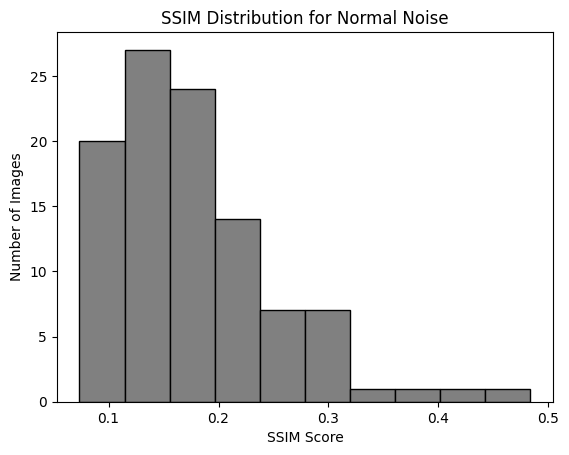

In [5]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Normal_Noise'].dropna(), bins=10, color='grey', edgecolor='black')
plt.title('SSIM Distribution for Normal Noise')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


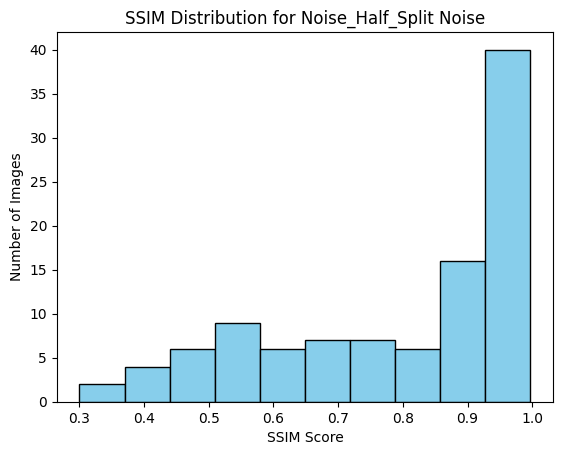

In [6]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Half_Split'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('SSIM Distribution for Noise_Half_Split Noise')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


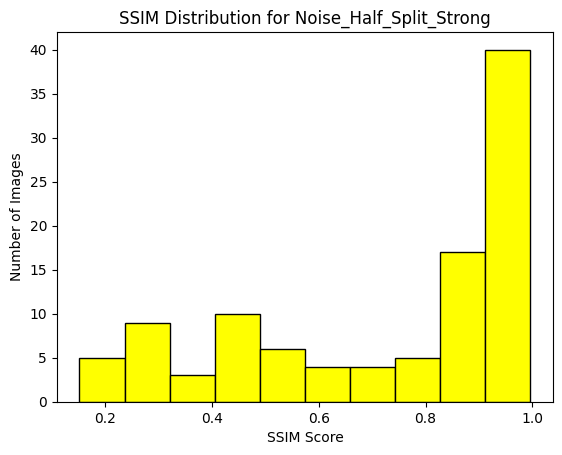

In [7]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Half_Split_Strong'].dropna(), bins=10, color='yellow', edgecolor='black')
plt.title('SSIM Distribution for Noise_Half_Split_Strong')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


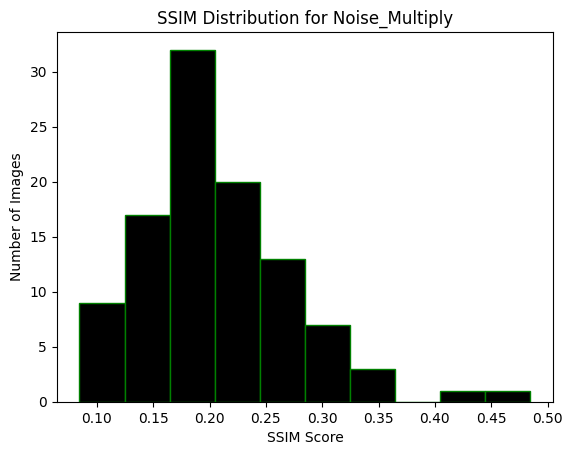

In [8]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Multiply'].dropna(), bins=10, color='black', edgecolor='green')
plt.title('SSIM Distribution for Noise_Multiply')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Multiply_Strong'].dropna(), bins=10, color='pink', edgecolor='black')
plt.title('SSIM Distribution for Noise_Multiply_Strong')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Overlay'].dropna(), bins=10, color='green', edgecolor='black')
plt.title('SSIM Distribution for Noise_Overlay')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram for Median_Blur
plt.hist(df['Noise_Overlay_Strong'].dropna(), bins=10, color='yellow', edgecolor='black')
plt.title('SSIM Distribution for Noise_Overlay_Strong')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


In [6]:
import seaborn as sns

# Select only the SSIM columns (skip 'Image' column)
ssim_columns = df.columns[1:]  # all except 'Image'

# Convert to long format for seaborn
df_long = df.melt(id_vars='Image', value_vars=ssim_columns,
                  var_name='Noise_Type', value_name='SSIM')

plt.figure(figsize=(12,6))
sns.histplot(data=df_long, x='SSIM', hue='Noise_Type', bins=10, element='step', stat='count')
plt.title('SSIM Distribution for All Noise/Blur Types')
plt.xlabel('SSIM Score')
plt.ylabel('Number of Images')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
num_cols = len(ssim_columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(8, 3*num_cols))

for i, col in enumerate(ssim_columns):
    axes[i].hist(df[col].dropna(), bins=10, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'SSIM Distribution: {col}')
    axes[i].set_xlabel('SSIM')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()
